In [1]:
%matplotlib inline

import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0, 0.01, y.shape)    
    return X,y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.0554, -0.3661]) 
label: tensor([5.5520])


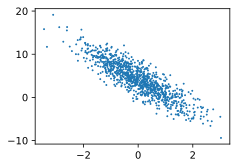

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [12]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #这些样本是随机读取的 没有特定的顺序
    random.shuffle(indices)
    
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [25]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X, '\n', y)
    break

tensor([[ 2.5167,  0.1966],
        [-2.2647,  0.1915],
        [-0.5402, -0.9525],
        [ 0.4794, -1.2932],
        [-0.2492, -0.3873],
        [-0.6803,  0.8044],
        [ 1.3463,  1.4290],
        [-0.1129,  0.2897],
        [-0.8923, -0.4317],
        [ 0.0414, -1.8149]]) 
 tensor([[ 8.5722],
        [-0.9797],
        [ 6.3505],
        [ 9.5581],
        [ 5.0061],
        [ 0.1019],
        [ 2.0293],
        [ 2.9950],
        [ 3.8865],
        [10.4517]])


In [28]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [29]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [30]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2/2

In [31]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [32]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.032809
epoch 2, loss 0.000111
epoch 3, loss 0.000049


In [33]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0006, 0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)
